In [2]:
import rasterio
import rasterio.mask
from shapely.geometry import box
from matplotlib import pyplot as plt

In [3]:
img_dir = "/Users/wintercyan/LocalDocuments/treeseg-resource/full_area/data/"
img_name = "pan"
img_type = ".tif"

img_full_path = f"{img_dir}{img_name}{img_type}"

In [4]:
panImage = rasterio.open(img_full_path)
readData = panImage.read()
print(readData.shape)


(3, 37994, 43990)


In [23]:
panImage.profile['transform']

Affine(8.542109260733762e-06, 0.0, 94.26909402017245,
       0.0, -8.542109260733725e-06, 29.74808742311597)

(3799, 4399)


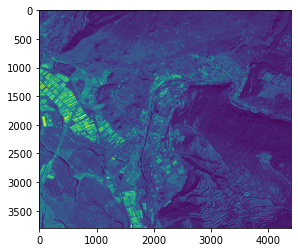

[[381 376 372 ... 272 263 238]
 [369 371 368 ... 267 256 236]
 [363 360 357 ... 232 228 234]
 ...
 [234 235 238 ...  84  64  73]
 [235 237 241 ...  88  71  74]
 [231 235 238 ...  92  67  56]]


In [5]:
(band, height, width) = readData.shape
center_area = readData[0, int(height*0.5):int(height*0.6), int(width*0.5):int(width*0.6)]
print(center_area.shape)
plt.imshow(center_area)
plt.show()
print(center_area)

In [6]:
import numpy as np
def image_normalize(im, axis = (0,1), c = 1e-8):
    return (im - im.mean(axis)) / (im.std(axis) + c)

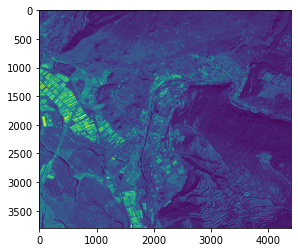

[[ 0.816613    0.78326288  0.75658277 ...  0.08958025  0.02955003
  -0.1372006 ]
 [ 0.7365727   0.74991275  0.72990267 ...  0.05623013 -0.01714015
  -0.15054065]
 [ 0.69655255  0.67654247  0.6565324  ... -0.17722075 -0.20390086
  -0.1638807 ]
 ...
 [-0.1638807  -0.15721068 -0.1372006  ... -1.16438448 -1.29778499
  -1.23775476]
 [-0.15721068 -0.14387063 -0.11719053 ... -1.13770438 -1.25109481
  -1.23108474]
 [-0.18389078 -0.15721068 -0.1372006  ... -1.11102428 -1.27777491
  -1.35114519]]
max: 5.025398907199884, min: -1.3511451907702392


In [7]:
img_norm = image_normalize(center_area)
plt.imshow(img_norm)
plt.show()
print(img_norm)
print(f"max: {np.max(img_norm)}, min: {np.min(img_norm)}")

In [8]:
# plt.hist(center_area, bins='auto')
# plt.show()

In [20]:
import os
profile = panImage.profile
profile['dtype'] = rasterio.float32
write_arr = img_norm.astype(profile['dtype'])
print(type(profile))
write_type = ".png"
# all_norm = image_normalize(readData)
with rasterio.open(f"/Users/wintercyan/LocalDocuments/treeseg-resource/full_area/pan_png/{img_name}{write_type}", 'w', **profile) as dst:
    dst.write(write_arr, 1)

<class 'rasterio.profiles.Profile'>


In [15]:
# test * and **

# 1. when defining a function's FORMAL args
def func1(*args):
    print("list arg: ", args)
    for a in args:
        print(a)

def func2(**kwargs):
    print("dict arg: ", kwargs)
    for a in kwargs:
        print(a, kwargs[a])

func1(1,2,3)

func2(a1=1, a2=2, a3=3)

# 2. added before ACTUAL args when invoke function
print("-----------------------")
list_arg = ['a','b','c','d','e']
dict_arg = {"arg1":"num 1", "arg2":"num 2", "arg3":"num 3", "arg4":"num 4"}
func1(*list_arg)
func2(**dict_arg)

list arg:  (1, 2, 3)
1
2
3
dict arg:  {'a1': 1, 'a2': 2, 'a3': 3}
a1 1
a2 2
a3 3
-----------------------
list arg:  ('a', 'b', 'c', 'd', 'e')
a
b
c
d
e
dict arg:  {'arg1': 'num 1', 'arg2': 'num 2', 'arg3': 'num 3', 'arg4': 'num 4'}
arg1 num 1
arg2 num 2
arg3 num 3
arg4 num 4


max: 4.703505039215088, min: -1.0793907642364502


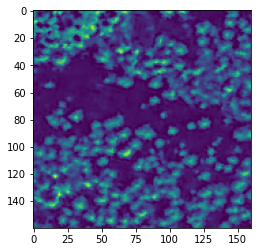

In [39]:
from PIL import Image
img = Image.open("/Users/wintercyan/LocalDocuments/treeseg-resource/test/png_dataset/r5-c16-pan.png")
arr = np.array(img)
print(f"max: {np.max(arr)}, min: {np.min(arr)}")
plt.imshow(arr)
plt.show()